Correlation analysis between the Ethereum currency and Reddit

In [1]:
import pandas as pd
import numpy as np
# misc
import datetime as dt
from pprint import pprint
from itertools import chain
import redditcleaner
import re

# sentiment analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, RegexpTokenizer # tokenize words
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob
import spacy

porter = PorterStemmer()
nlp = spacy.load("en_core_web_sm")
# visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 8) # default plot size
import seaborn as sns
sns.set(style='whitegrid', palette='Dark2')
from wordcloud import WordCloud
nltk.download('vader_lexicon') # get lexicons data
nltk.download('punkt') # for tokenizer
nltk.download('stopwords')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rameshbabum\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rameshbabum\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rameshbabum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
Ethereum_data_Vadar = pd.read_csv("final_cleaned.csv")
Market_data = pd.read_csv("ethereum_market_data_month_latest.csv")

In [3]:
def calculate_polarity(text):
    return sid.polarity_scores(text)

In [4]:
Ethereum_data_Vadar['cleaned_discription'] = Ethereum_data_Vadar['cleaned_discription'].astype(str)

In [5]:
Ethereum_data_Vadar['poly'] = Ethereum_data_Vadar['cleaned_discription'].apply(calculate_polarity)

In [6]:
res = [*Ethereum_data_Vadar['cleaned_discription'].apply(sid.polarity_scores)]
pprint(res[:3])

[{'compound': 0.0258, 'neg': 0.049, 'neu': 0.9, 'pos': 0.051},
 {'compound': -0.128, 'neg': 0.118, 'neu': 0.786, 'pos': 0.096},
 {'compound': 0.9186, 'neg': 0.0, 'neu': 0.853, 'pos': 0.147}]


In [7]:
sentiment_df = pd.DataFrame.from_records(res)
Ethereum_data_Vadar = pd.concat([Ethereum_data_Vadar, sentiment_df], axis=1, join='inner')
Ethereum_data_Vadar.head()

,Unnamed: 0,created_utc,title,selftext,Date,cleaned_discription,poly,neg,neu,pos,compound
0,0,1.637880e+09,Ethereum Facebook Group acquired - How is that...,I'm a member of the largest public Ethereum gr...,2021-11-25,member largest public ethereum group facebook ...,"{'neg': 0.049, 'neu': 0.9, 'pos': 0.051, 'comp...",0.049,0.900,0.051,0.0258
1,1,1.637880e+09,CRO erc20 is safe?,Hello i have some CRO on an hardware wallet bu...,2021-11-25,hello cro hardwar wallet erc20 cro ethereum to...,"{'neg': 0.118, 'neu': 0.786, 'pos': 0.096, 'co...",0.118,0.786,0.096,-0.1280
2,2,1.637878e+09,Write off question!,Hi everyone I'm a sole proprietor in Hawaii US...,2021-11-25,hi everyon sole proprietor hawaii usa year une...,"{'neg': 0.0, 'neu': 0.853, 'pos': 0.147, 'comp...",0.000,0.853,0.147,0.9186
3,3,1.637878e+09,MOONX | Low Cap |3m MC | Utility coin for Mark...,MOONX MoonX is a Utility Token that will revi...,2021-11-25,moonx moonx util token revitalis bsc space bri...,"{'neg': 0.042, 'neu': 0.847, 'pos': 0.111, 'co...",0.042,0.847,0.111,0.8750
4,4,1.637878e+09,Macy’s launching Polygon powered commemorative...,Macy’s dropped their first ever NFT collection...,2021-11-25,maci drop first ever nft collect consist 10 un...,"{'neg': 0.015, 'neu': 0.868, 'pos': 0.117, 'co...",0.015,0.868,0.117,0.9217


In [8]:
THRESHOLD = 0.2

conditions = [
    (Ethereum_data_Vadar['compound'] <= -THRESHOLD),
    (Ethereum_data_Vadar['compound'] > -THRESHOLD) & (Ethereum_data_Vadar['compound'] < THRESHOLD),
    (Ethereum_data_Vadar['compound'] >= THRESHOLD),
    ]

values = ["neg", "neu", "pos"]
Ethereum_data_Vadar['label'] = np.select(conditions, values)

In [9]:
Ethereum_data_Vadar.label.value_counts()

pos    19124
neg     3274
neu     3237
Name: label, dtype: int64

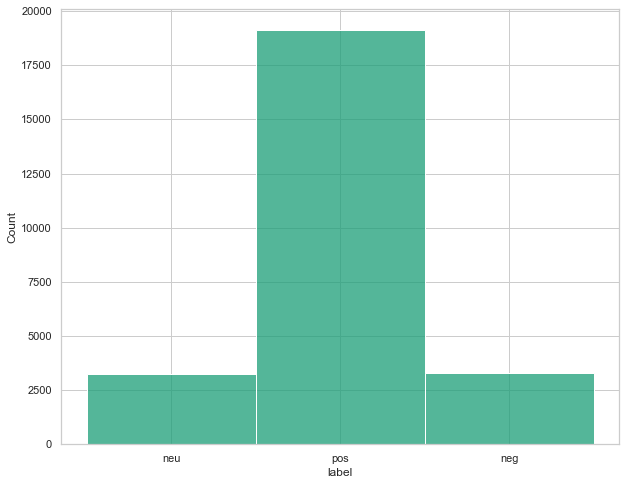

In [10]:
sns.histplot(Ethereum_data_Vadar.label);

In [11]:
#greater than the start date and smaller than the end date 11/25/2021 09/02/2021
start_date ='2021-09-02'
end_date='2021-11-25'
mask = (Ethereum_data_Vadar['Date'] >= start_date) & (Ethereum_data_Vadar['Date'] <= end_date)

In [12]:
df = Ethereum_data_Vadar.loc[mask]

In [13]:
df.reset_index()

,index,Unnamed: 0,created_utc,title,selftext,Date,cleaned_discription,poly,neg,neu,pos,compound,label
0,0,0,1.637880e+09,Ethereum Facebook Group acquired - How is that...,I'm a member of the largest public Ethereum gr...,2021-11-25,member largest public ethereum group facebook ...,"{'neg': 0.049, 'neu': 0.9, 'pos': 0.051, 'comp...",0.049,0.900,0.051,0.0258,neu
1,1,1,1.637880e+09,CRO erc20 is safe?,Hello i have some CRO on an hardware wallet bu...,2021-11-25,hello cro hardwar wallet erc20 cro ethereum to...,"{'neg': 0.118, 'neu': 0.786, 'pos': 0.096, 'co...",0.118,0.786,0.096,-0.1280,neu
2,2,2,1.637878e+09,Write off question!,Hi everyone I'm a sole proprietor in Hawaii US...,2021-11-25,hi everyon sole proprietor hawaii usa year une...,"{'neg': 0.0, 'neu': 0.853, 'pos': 0.147, 'comp...",0.000,0.853,0.147,0.9186,pos
3,3,3,1.637878e+09,MOONX | Low Cap |3m MC | Utility coin for Mark...,MOONX MoonX is a Utility Token that will revi...,2021-11-25,moonx moonx util token revitalis bsc space bri...,"{'neg': 0.042, 'neu': 0.847, 'pos': 0.111, 'co...",0.042,0.847,0.111,0.8750,pos
4,4,4,1.637878e+09,Macy’s launching Polygon powered commemorative...,Macy’s dropped their first ever NFT collection...,2021-11-25,maci drop first ever nft collect consist 10 un...,"{'neg': 0.015, 'neu': 0.868, 'pos': 0.117, 'co...",0.015,0.868,0.117,0.9217,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9937,9937,10758,1.630544e+09,Technical Test Reference,The development of SP4C3's first test network ...,2021-09-02,develop sp4c3 first test network progress aita...,"{'neg': 0.024, 'neu': 0.92, 'pos': 0.055, 'com...",0.024,0.920,0.055,0.9217,pos
9938,9938,10759,1.630543e+09,Hey 👋 I’m here to tell you about Boost Coin ⚡️...,Boost Coin is the native cryptocurrency of the...,2021-09-02,boost coin nativ cryptocurr boost ecosystem ad...,"{'neg': 0.018, 'neu': 0.712, 'pos': 0.27, 'com...",0.018,0.712,0.270,0.9951,pos
9939,9939,10761,1.630543e+09,Coinbase’s Bitcoin (BTC) Outflow Highest Since...,Bitcoin has started off the new month of Septe...,2021-09-02,bitcoin start new month septemb new low seen w...,"{'neg': 0.047, 'neu': 0.846, 'pos': 0.107, 'co...",0.047,0.846,0.107,0.9571,pos
9940,9940,10762,1.630542e+09,www.cyberpatch.news,Hey everyone wanted to shameless plug the Cybe...,2021-09-02,hey everyon want shameless plug cybersecur new...,"{'neg': 0.07, 'neu': 0.814, 'pos': 0.116, 'com...",0.070,0.814,0.116,0.1531,neu


In [14]:
from datetime import datetime
def convertdate(ts):
    return datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')

In [15]:
df['Date'] = df['created_utc'].apply(convertdate)

<ipython-input-15-47183eb34072>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['created_utc'].apply(convertdate)


In [16]:
df

,Unnamed: 0,created_utc,title,selftext,Date,cleaned_discription,poly,neg,neu,pos,compound,label
0,0,1.637880e+09,Ethereum Facebook Group acquired - How is that...,I'm a member of the largest public Ethereum gr...,2021-11-25 22:46:41,member largest public ethereum group facebook ...,"{'neg': 0.049, 'neu': 0.9, 'pos': 0.051, 'comp...",0.049,0.900,0.051,0.0258,neu
1,1,1.637880e+09,CRO erc20 is safe?,Hello i have some CRO on an hardware wallet bu...,2021-11-25 22:33:18,hello cro hardwar wallet erc20 cro ethereum to...,"{'neg': 0.118, 'neu': 0.786, 'pos': 0.096, 'co...",0.118,0.786,0.096,-0.1280,neu
2,2,1.637878e+09,Write off question!,Hi everyone I'm a sole proprietor in Hawaii US...,2021-11-25 22:13:09,hi everyon sole proprietor hawaii usa year une...,"{'neg': 0.0, 'neu': 0.853, 'pos': 0.147, 'comp...",0.000,0.853,0.147,0.9186,pos
3,3,1.637878e+09,MOONX | Low Cap |3m MC | Utility coin for Mark...,MOONX MoonX is a Utility Token that will revi...,2021-11-25 22:07:58,moonx moonx util token revitalis bsc space bri...,"{'neg': 0.042, 'neu': 0.847, 'pos': 0.111, 'co...",0.042,0.847,0.111,0.8750,pos
4,4,1.637878e+09,Macy’s launching Polygon powered commemorative...,Macy’s dropped their first ever NFT collection...,2021-11-25 21:58:39,maci drop first ever nft collect consist 10 un...,"{'neg': 0.015, 'neu': 0.868, 'pos': 0.117, 'co...",0.015,0.868,0.117,0.9217,pos
...,...,...,...,...,...,...,...,...,...,...,...,...
9937,10758,1.630544e+09,Technical Test Reference,The development of SP4C3's first test network ...,2021-09-02 01:01:07,develop sp4c3 first test network progress aita...,"{'neg': 0.024, 'neu': 0.92, 'pos': 0.055, 'com...",0.024,0.920,0.055,0.9217,pos
9938,10759,1.630543e+09,Hey 👋 I’m here to tell you about Boost Coin ⚡️...,Boost Coin is the native cryptocurrency of the...,2021-09-02 00:44:04,boost coin nativ cryptocurr boost ecosystem ad...,"{'neg': 0.018, 'neu': 0.712, 'pos': 0.27, 'com...",0.018,0.712,0.270,0.9951,pos
9939,10761,1.630543e+09,Coinbase’s Bitcoin (BTC) Outflow Highest Since...,Bitcoin has started off the new month of Septe...,2021-09-02 00:34:14,bitcoin start new month septemb new low seen w...,"{'neg': 0.047, 'neu': 0.846, 'pos': 0.107, 'co...",0.047,0.846,0.107,0.9571,pos
9940,10762,1.630542e+09,www.cyberpatch.news,Hey everyone wanted to shameless plug the Cybe...,2021-09-02 00:22:13,hey everyon want shameless plug cybersecur new...,"{'neg': 0.07, 'neu': 0.814, 'pos': 0.116, 'com...",0.070,0.814,0.116,0.1531,neu


In [17]:
df['Date'] = pd.to_datetime(df['Date'])
df.index = df['Date']

<ipython-input-17-d14ea18e0d6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [18]:
df_grouped = df.groupby(pd.Grouper(freq='1d'))['compound'].sum()

In [19]:
df_grouped

Date
2021-09-02    83.7455
2021-09-03    84.7916
2021-09-04    63.7221
2021-09-05    86.7594
2021-09-06    75.8037
               ...   
2021-11-21    65.4575
2021-11-22    67.6558
2021-11-23    75.3299
2021-11-24    78.5670
2021-11-25    59.7962
Freq: D, Name: compound, Length: 85, dtype: float64

In [20]:
Market_data['Date'] = pd.to_datetime(Market_data['Date'])
Market_data.index = Market_data['Date']

crypto_usd_grouped = Market_data.groupby(pd.Grouper(freq='1d'))['close'].mean()

In [21]:
crypto_usd_grouped

Date
2021-09-02    3787.97
2021-09-03    3940.06
2021-09-04    3887.53
2021-09-05    3952.17
2021-09-06    3928.89
               ...   
2021-11-21    4262.99
2021-11-22    4089.16
2021-11-23    4341.62
2021-11-24    4270.74
2021-11-25    4525.87
Freq: D, Name: close, Length: 85, dtype: float64

In [22]:
# crypto_usd_grouped.drop(crypto_usd_grouped.tail(4).index, inplace=True)

In [23]:
len(crypto_usd_grouped)

85

In [24]:
len(df_grouped)

85

In [25]:
import scipy as sp
sp.corrcoef(df_grouped,crypto_usd_grouped)

<ipython-input-25-949cae44f593>:2: DeprecationWarning: scipy.corrcoef is deprecated and will be removed in SciPy 2.0.0, use numpy.corrcoef instead
  sp.corrcoef(df_grouped,crypto_usd_grouped)


array([[1.        , 0.72099396],
       [0.72099396, 1.        ]])

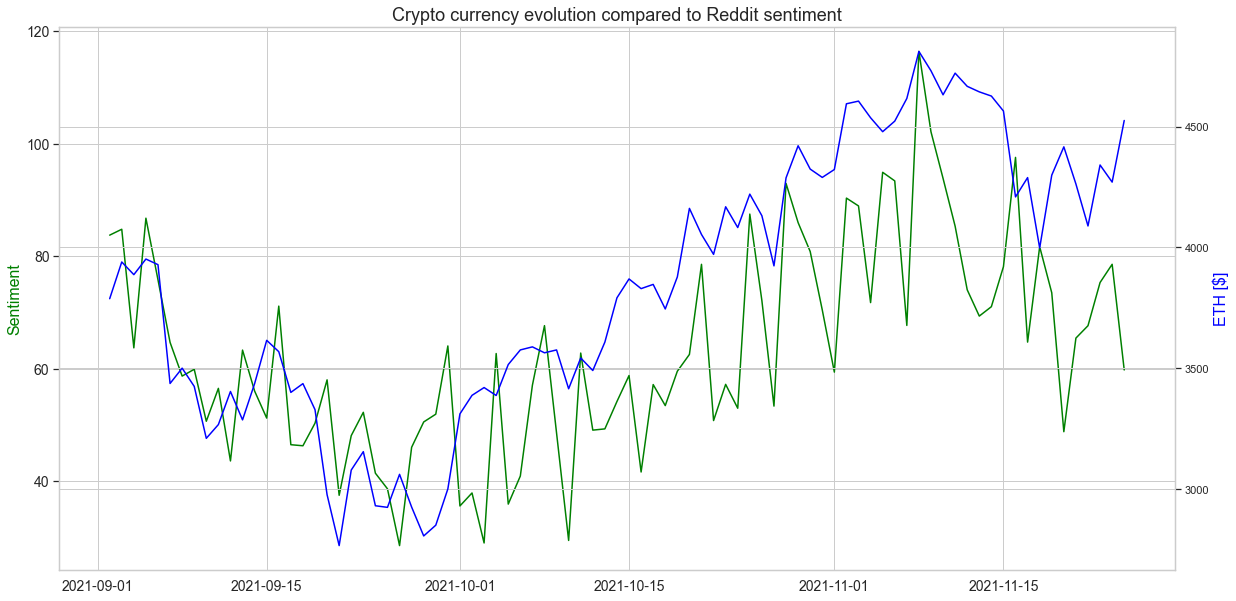

In [26]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Crypto currency evolution compared to Reddit sentiment", fontsize=18)
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot_date(df_grouped.index, df_grouped, 'g-')
ax2.plot_date(crypto_usd_grouped.index, crypto_usd_grouped, 'b-')

ax1.set_ylabel("Sentiment", color='g', fontsize=16)
ax2.set_ylabel(f"ETH [$]", color='b', fontsize=16)
plt.show()

In [27]:
# Define the cross-correlation function
def crosscorr(datax, datay, lag, method="pearson"):
    return datax.corr(datay.shift(lag), method=method)

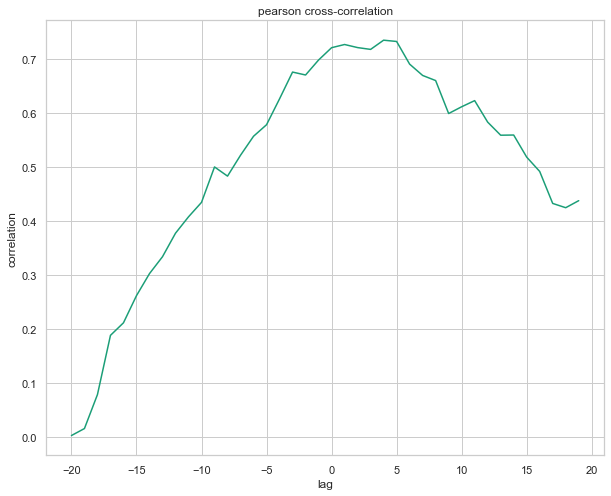

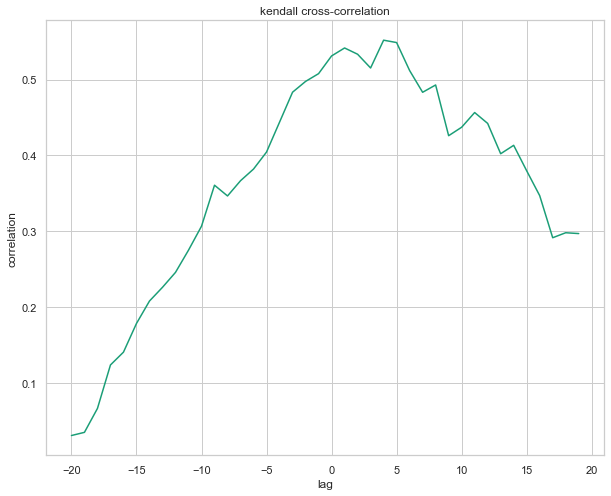

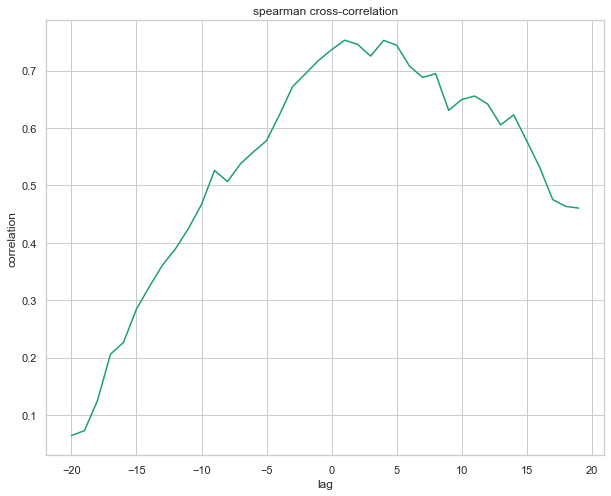

In [28]:
xcov = [crosscorr(df_grouped, crypto_usd_grouped, lag=i, method="pearson") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("pearson cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

xcov = [crosscorr(df_grouped, crypto_usd_grouped, lag=i, method="kendall") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("kendall cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

xcov = [crosscorr(df_grouped, crypto_usd_grouped, lag=i, method="spearman") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("spearman cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()